In [1]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

COUNT OF JOB TITLES

In [2]:
df_median = df.groupby('job_title_short')['salary_year_avg'].median()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Spain')])

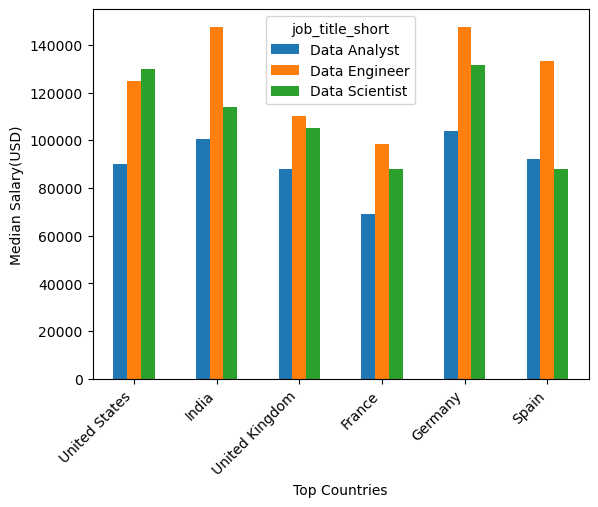

In [3]:
# I want to get a graph that shows the median salary by occupation, based on countries.
df_countries = df.pivot_table(index='job_country',
                         columns='job_title_short',
                         values='salary_year_avg',
                         aggfunc='median')

# Retrieve de top countries
countries = df['job_country'].value_counts().head(6).index

# Make a list of the jobs i'm interested in
jobs = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Modify the dataframe then
df_countries=df_countries.loc[countries, jobs]

#Plotting
df_countries.plot(kind='bar')
plt.xlabel('Top Countries')
plt.ylabel('Median Salary(USD)')
plt.xticks(rotation = 45, ha = 'right')


    THIS FOLLOWING CODE ALSO WORKS

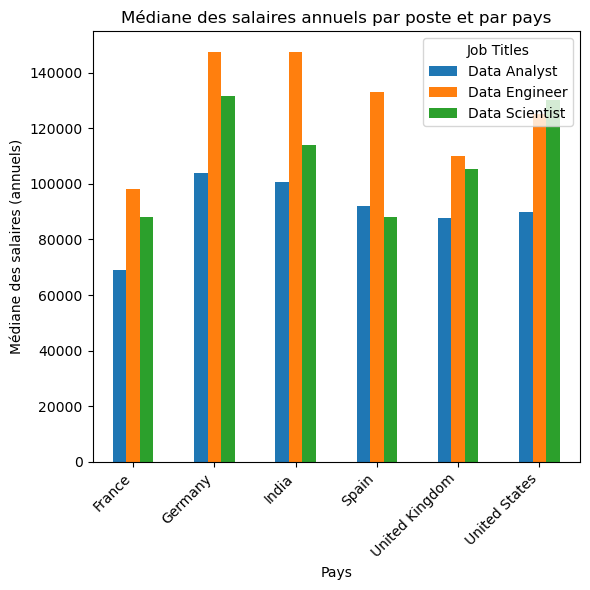

In [4]:
# Étape 1: Filtrer pour garder seulement les postes de la liste spécifiée
df_filtered = df[df['job_title_short'].isin(jobs)]

# Étape 2: Trouver les 6 pays les plus fréquents
top_countries = df_filtered['job_country'].value_counts().nlargest(6).index

# Étape 3: Filtrer par les 6 pays les plus fréquents
df_filtered = df_filtered[df_filtered['job_country'].isin(top_countries)]

# Étape 4: Calculer la médiane des salaires par job et par pays
salary_median = df_filtered.groupby(['job_country', 'job_title_short'])['salary_year_avg'].median().unstack()

# Étape 5: Tracer un graphique de barres
salary_median.plot(kind='bar', figsize=(6, 6))

# Personnalisation du graphique
plt.title('Médiane des salaires annuels par poste et par pays')
plt.xlabel('Pays')
plt.ylabel('Médiane des salaires (annuels)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Titles')
plt.tight_layout()

# Afficher le graphique
plt.show()


In [5]:
df['salary_year_avg'].nlargest(6)

554784    960000.0
665811    890000.0
168402    650000.0
387378    585000.0
160521    550000.0
404932    525000.0
Name: salary_year_avg, dtype: float64